In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Plotting the Raw DataSets:

In [3]:
df_a = pd.read_csv('../../bricks_data/north.csv')
df_b = pd.read_csv('../../bricks_data/north_test.csv')
df_north = pd.concat((df_a, df_b), axis=0)

df_c = pd.read_csv('../../bricks_data/south.csv')
df_d = pd.read_csv('../../bricks_data/south_test.csv')
df_south = pd.concat((df_c, df_d), axis=0)


df_e = pd.read_csv('../../bricks_data/des.csv')

df_f = pd.read_csv('../../bricks_data/des_test.csv')
df_des = pd.concat((df_e, df_f), axis=0)

print(len(df_south))
print(len(df_north))
print(len(df_des))


185718
97537
86631


In [53]:
#NORTH
# Cut factors == North == DES ==  50
# South == 200
df = df_des
area = "des"

In [54]:
#df_all = pd.concat((df_a, df_b, df_c, df_d, df_e, df_f), axis=0)

y_lrg = df['lrg']#.to_numpy(copy=True)
y_elg = df['elg']#.to_numpy(copy=True)
y_qso = df['qso']#.to_numpy(copy=True)

X = df.drop(columns=['pixel_id',
                                'exposures',
                                'lrg','elg','qso'])#.to_numpy(copy=True)

ols_lrg_geometric = sm.OLS(y_lrg,X).fit()
print(ols_lrg_geometric.summary())
print()
ols_elg_geometric = sm.OLS(y_elg,X).fit()
print(ols_elg_geometric.summary())
print()
ols_qso_geometric = sm.OLS(y_qso,X).fit()
print(ols_qso_geometric.summary())



                                 OLS Regression Results                                
Dep. Variable:                    lrg   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                          5.924e+04
Date:                Tue, 31 Aug 2021   Prob (F-statistic):                        0.00
Time:                        15:33:54   Log-Likelihood:                     -3.2404e+05
No. Observations:               86631   AIC:                                  6.481e+05
Df Residuals:                   86616   BIC:                                  6.482e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
df['lrg_density'] = (df['lrg']/df.lrg.mean()) - 1
df['elg_density'] = (df['elg']/df.elg.mean()) - 1
df['qso_density'] = (df['qso']/df.qso.mean()) - 1

print(df.columns)


Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'lrg_density', 'elg_density',
       'qso_density'],
      dtype='object')


In [56]:
col = ['stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z']


df_sort = df

print(len(df_sort))
for c in col:
    df_sort = df_sort.sort_values(c, axis=0, ascending=True )
    df_sort = df_sort[50:]
    df_sort = df_sort.sort_values(c, axis=0, ascending=False )
    df_sort = df_sort[50:]

print(len(df_sort))



86631
85131


15


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

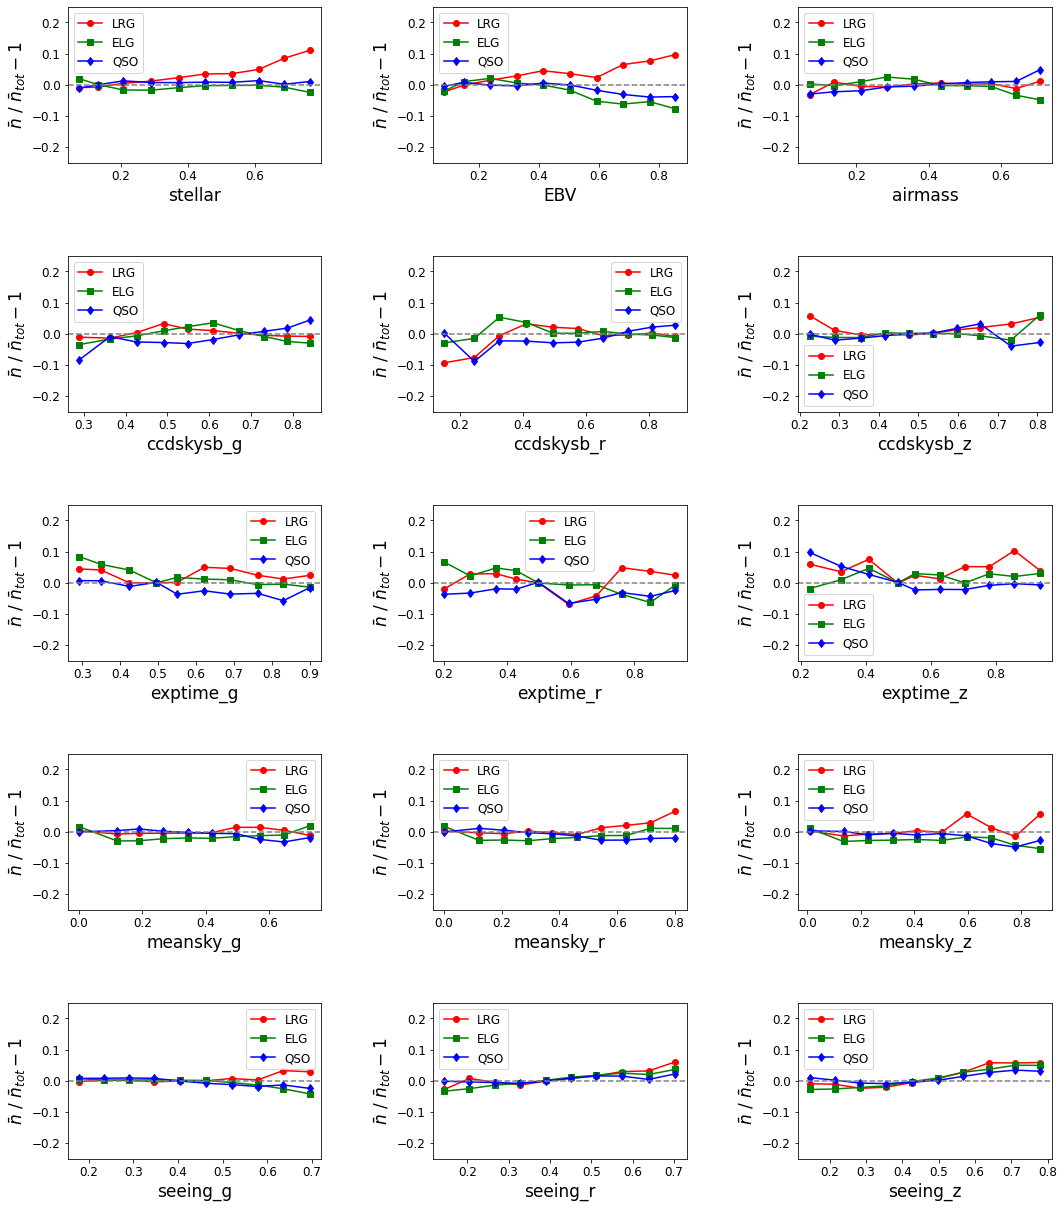

In [57]:
print(len(col))
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,18))
#plt.title("Raw Test Set Systematics Dependency - North")
#fig = plt.figure()
i = 0
for ax in ax.flatten():
    x_label = col[i]
    df_sort['bin'] = pd.cut(df_sort[x_label], bins=10, labels=False, duplicates='drop', include_lowest=True)
    #df_test_north['bin'] = pd.qcut(df_test_north[x_label], q=15, labels=False, duplicates='drop')
    """print(x_label)
    print(df_sort['bin'].value_counts())
    i += 1
    continue"""
    grouped = df_sort.groupby('bin')
    x = grouped[x_label].mean()
    lrg = grouped['lrg_density'].mean()
    elg = grouped['elg_density'].mean()
    qso = grouped['qso_density'].mean()

    plt.axes(ax)
    plt.plot(x,lrg, c='red', marker='o', label="LRG")
    plt.plot(x, elg, c='green', marker='s', label="ELG")
    plt.plot(x, qso, c='blue', marker='d', label="QSO")
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.ylim([-0.25, 0.25])
    plt.xlabel(x_label)
    plt.ylabel(r'$\bar n \  / \  \bar n_{tot} - 1 $')
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 17

    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)

    plt.legend()

    i += 1

#plt.suptitle("Impact of Imaging Systematics on Galaxy Density - North")
fig.tight_layout(pad=3.0)
plt.savefig(f"report_fig/{area}_sys_test.eps", bbox_inches='tight', format='eps', dpi=1500)
plt.show()


In [219]:
# Importing Datasets

df_test_north = pd.read_csv('results/north.csv')
df_test_south = pd.read_csv('results/south.csv')
df_test_des = pd.read_csv('results/des.csv')


In [220]:
df_test_north.columns

Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_deep', 'elg_deep', 'qso_deep', 'lrg_nn', 'elg_nn', 'qso_nn'],
      dtype='object')

# NORTH

### obtaining visual metrics for evaluation of cleansing

In [221]:
area = 'north'
#df_test_north = df_test_des

df_test_north['lrg_density'] = (df_test_north['lrg']/df_test_north.lrg.mean()) - 1
df_test_north['elg_density'] = (df_test_north['elg']/df_test_north.elg.mean()) - 1
df_test_north['qso_density'] = (df_test_north['qso']/df_test_north.qso.mean()) - 1
df_test_north['lrg_lin_density'] = (df_test_north['lrg_lin']/df_test_north.lrg_lin.mean()) - 1
df_test_north['elg_lin_density'] = (df_test_north['elg_lin']/df_test_north.elg_lin.mean()) - 1
df_test_north['qso_lin_density'] = (df_test_north['qso_lin']/df_test_north.qso_lin.mean()) - 1
df_test_north['lrg_nn_density'] = (df_test_north['lrg_nn']/df_test_north.lrg_nn.mean()) - 1
df_test_north['elg_nn_density'] = (df_test_north['elg_nn']/df_test_north.elg_nn.mean()) - 1
df_test_north['qso_nn_density'] = (df_test_north['qso_nn']/df_test_north.qso_nn.mean()) - 1
df_test_north['lrg_deep_density'] = (df_test_north['lrg_deep']/df_test_north.lrg_deep.mean()) - 1
df_test_north['elg_deep_density'] = (df_test_north['elg_deep']/df_test_north.elg_deep.mean()) - 1
df_test_north['qso_deep_density'] = (df_test_north['qso_deep']/df_test_north.qso_deep.mean()) - 1




df_test_north.isna().sum()


print(df_test_north.columns)


Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_deep', 'elg_deep', 'qso_deep', 'lrg_nn', 'elg_nn', 'qso_nn',
       'lrg_density', 'elg_density', 'qso_density', 'lrg_lin_density',
       'elg_lin_density', 'qso_lin_density', 'lrg_nn_density',
       'elg_nn_density', 'qso_nn_density', 'lrg_deep_density',
       'elg_deep_density', 'qso_deep_density'],
      dtype='object')


In [222]:
rem = ['exposures','pixel_id', 'lrg', 'elg', 'qso','lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_deep', 'elg_deep', 'qso_deep', 'lrg_nn', 'elg_nn', 'qso_nn',
       'lrg_density', 'elg_density', 'qso_density', 'lrg_lin_density',
       'elg_lin_density', 'qso_lin_density', 'lrg_nn_density',
       'elg_nn_density', 'qso_nn_density', 'lrg_deep_density',
       'elg_deep_density', 'qso_deep_density']
col = list(df_test_north.columns)
col = [x for x in col if x not in rem]
print(len(col))

15


In [223]:
df_sort = df_test_north

print(len(df_sort))
for c in col:
    df_sort = df_sort.sort_values(c, axis=0, ascending=True )
    df_sort = df_sort[25:]
    df_sort = df_sort.sort_values(c, axis=0, ascending=False )
    df_sort = df_sort[25:]

print(len(df_sort))


19505
18755


15


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


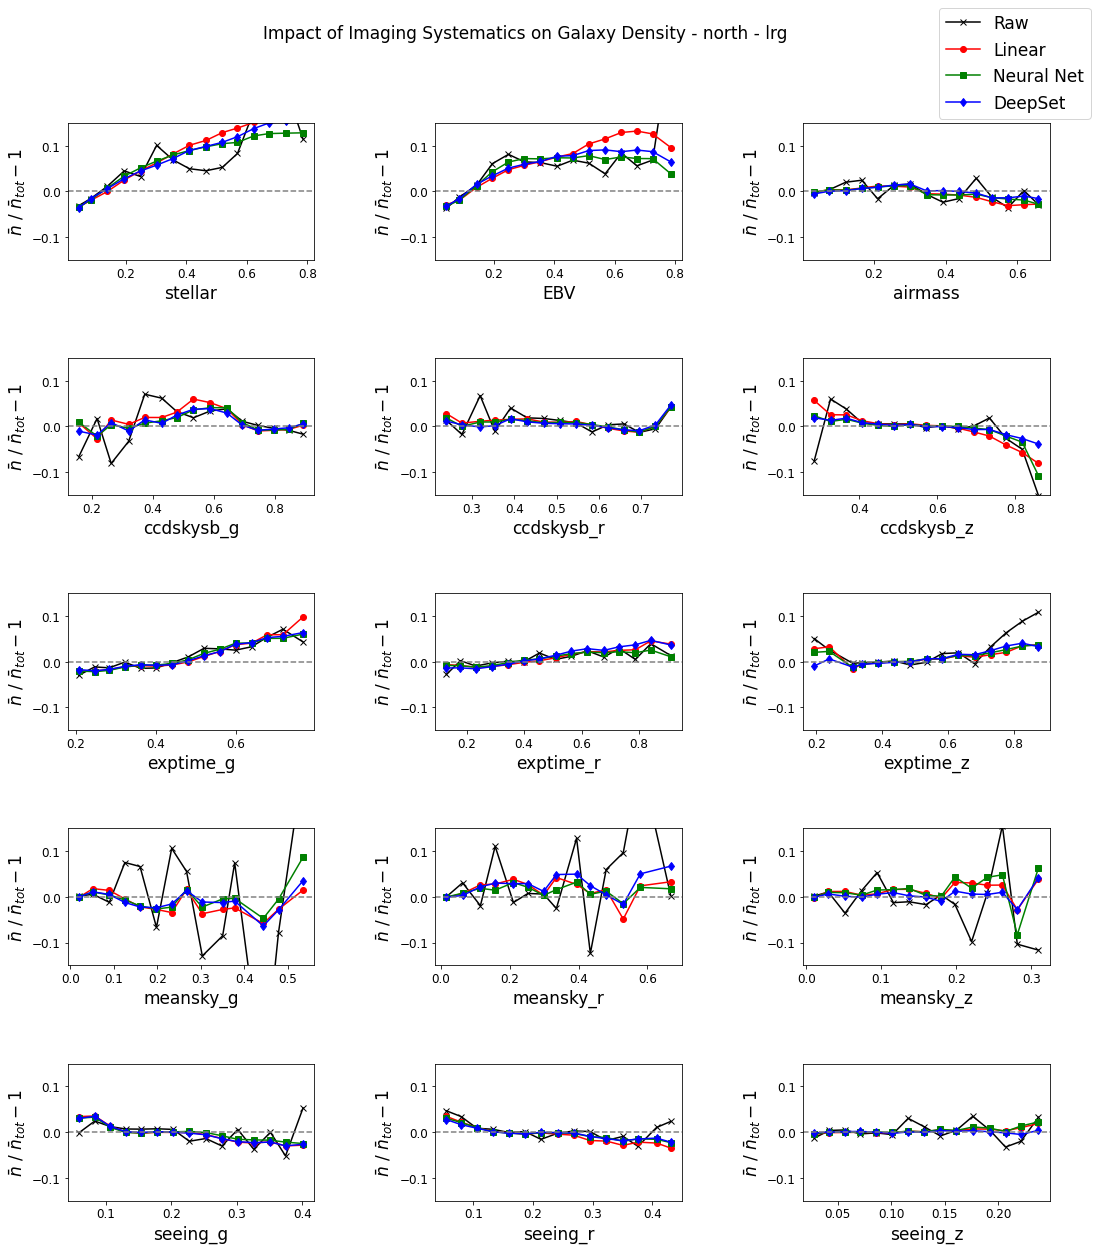

In [224]:
gal = 'lrg'
print(len(col))
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,18))
#plt.title("Raw Test Set Systematics Dependency - North")
#fig = plt.figure()
i = 0
for ax in ax.flatten():
    x_label = col[i]
    df_sort['bin'] = pd.cut(df_sort[x_label], bins=15, labels=False, duplicates='drop', include_lowest=True)
    #df_test_north['bin'] = pd.qcut(df_test_north[x_label], q=15, labels=False, duplicates='drop')
    """print(x_label)
    print(df_sort['bin'].value_counts())
    i += 1
    continue"""
    grouped = df_sort.groupby('bin')
    x = grouped[x_label].mean()
    elg = grouped[f'{gal}_density'].mean()
    elg_lin = grouped[f'{gal}_lin_density'].mean()
    elg_nn = grouped[f'{gal}_nn_density'].mean()
    elg_deep = grouped[f'{gal}_deep_density'].mean()

    plt.axes(ax)
    plt.plot(x, elg, c='black', marker='x', label="Raw")
    plt.plot(x,elg_lin, c='red', marker='o', label="Linear")
    plt.plot(x, elg_nn, c='green', marker='s', label="Neural Net")
    plt.plot(x, elg_deep, c='blue', marker='d', label="DeepSet")
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.ylim([-0.15, 0.15])
    plt.xlabel(x_label)
    plt.ylabel(r'$\bar n \  / \  \bar n_{tot} - 1 $')
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 17

    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)

    #plt.legend()

    i += 1

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.suptitle(f"Impact of Imaging Systematics on Galaxy Density - {area} - {gal}")
fig.tight_layout(pad=3.0)
plt.savefig(f"report_fig/{area}_{gal}_sys_test.eps", bbox_inches='tight', format='eps', dpi=1500)
plt.show()



15


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


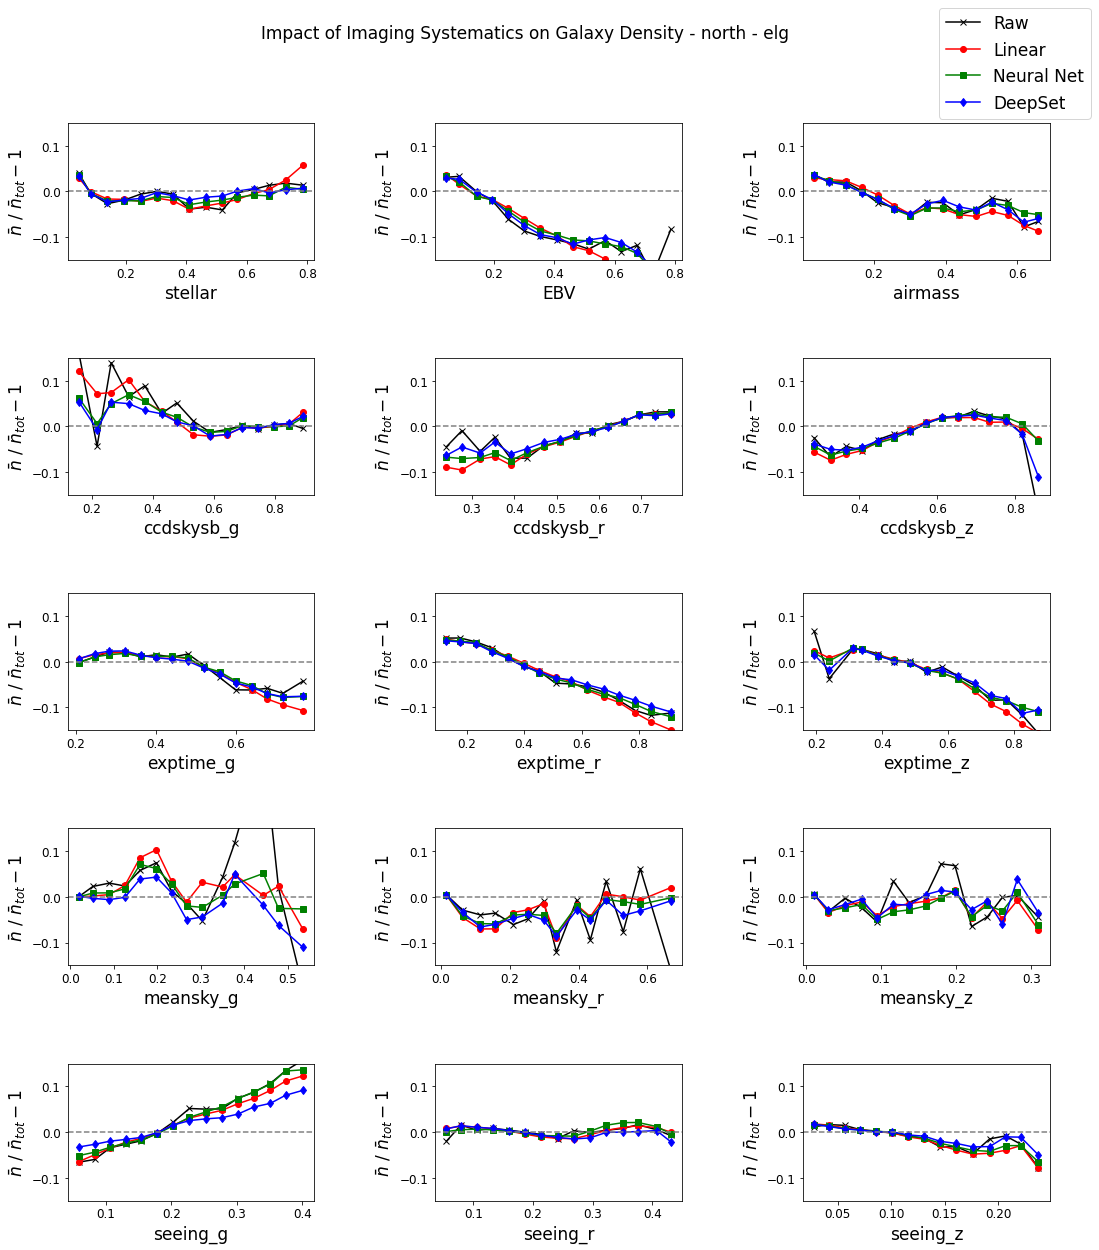

In [226]:
gal = 'elg'
print(len(col))
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,18))
#plt.title("Raw Test Set Systematics Dependency - North")
#fig = plt.figure()
i = 0
for ax in ax.flatten():
    x_label = col[i]
    df_sort['bin'] = pd.cut(df_sort[x_label], bins=15, labels=False, duplicates='drop', include_lowest=True)
    #df_test_north['bin'] = pd.qcut(df_test_north[x_label], q=15, labels=False, duplicates='drop')
    """print(x_label)
    print(df_sort['bin'].value_counts())
    i += 1
    continue"""
    grouped = df_sort.groupby('bin')
    x = grouped[x_label].mean()
    elg = grouped[f'{gal}_density'].mean()
    elg_lin = grouped[f'{gal}_lin_density'].mean()
    elg_nn = grouped[f'{gal}_nn_density'].mean()
    elg_deep = grouped[f'{gal}_deep_density'].mean()

    plt.axes(ax)
    plt.plot(x, elg, c='black', marker='x', label="Raw")
    plt.plot(x,elg_lin, c='red', marker='o', label="Linear")
    plt.plot(x, elg_nn, c='green', marker='s', label="Neural Net")
    plt.plot(x, elg_deep, c='blue', marker='d', label="DeepSet")
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.ylim([-0.15, 0.15])
    plt.xlabel(x_label)
    plt.ylabel(r'$\bar n \  / \  \bar n_{tot} - 1 $')
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 17

    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)

    #plt.legend()

    i += 1

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.suptitle(f"Impact of Imaging Systematics on Galaxy Density - {area} - {gal}")
fig.tight_layout(pad=3.0)
plt.savefig(f"report_fig/{area}_{gal}_sys_test.eps", bbox_inches='tight', format='eps', dpi=1500)
plt.show()






15


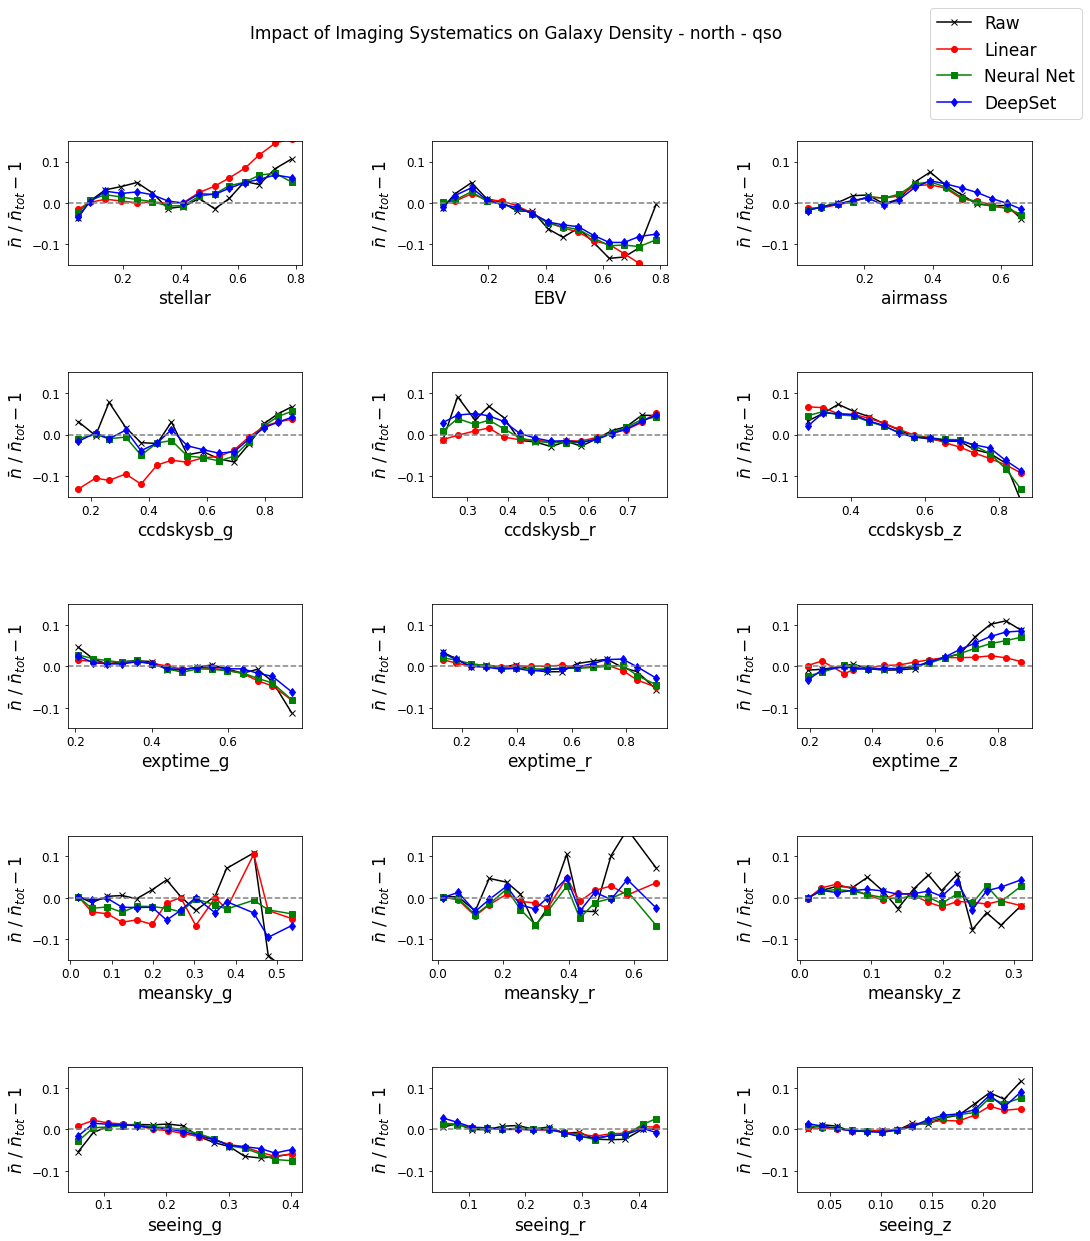

In [227]:

gal = 'qso'
print(len(col))
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,18))
#plt.title("Raw Test Set Systematics Dependency - North")
#fig = plt.figure()
i = 0
for ax in ax.flatten():
    x_label = col[i]
    df_sort['bin'] = pd.cut(df_sort[x_label], bins=15, labels=False, duplicates='drop', include_lowest=True)
    #df_test_north['bin'] = pd.qcut(df_test_north[x_label], q=15, labels=False, duplicates='drop')
    """print(x_label)
    print(df_sort['bin'].value_counts())
    i += 1
    continue"""
    grouped = df_sort.groupby('bin')
    x = grouped[x_label].mean()
    elg = grouped[f'{gal}_density'].mean()
    elg_lin = grouped[f'{gal}_lin_density'].mean()
    elg_nn = grouped[f'{gal}_nn_density'].mean()
    elg_deep = grouped[f'{gal}_deep_density'].mean()

    plt.axes(ax)
    plt.plot(x, elg, c='black', marker='x', label="Raw")
    plt.plot(x,elg_lin, c='red', marker='o', label="Linear")
    plt.plot(x, elg_nn, c='green', marker='s', label="Neural Net")
    plt.plot(x, elg_deep, c='blue', marker='d', label="DeepSet")
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.ylim([-0.15, 0.15])
    plt.xlabel(x_label)
    plt.ylabel(r'$\bar n \  / \  \bar n_{tot} - 1 $')
    SMALL_SIZE = 8
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 17

    plt.rc('font', size=20)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)

    #plt.legend()

    i += 1

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.suptitle(f"Impact of Imaging Systematics on Galaxy Density - {area} - {gal}")
fig.tight_layout(pad=3.0)
#plt.savefig(f"report_fig/{area}_{gal}_sys_test.eps", bbox_inches='tight', format='eps', dpi=1500)
plt.show()




In [ ]:
df_test_north

15


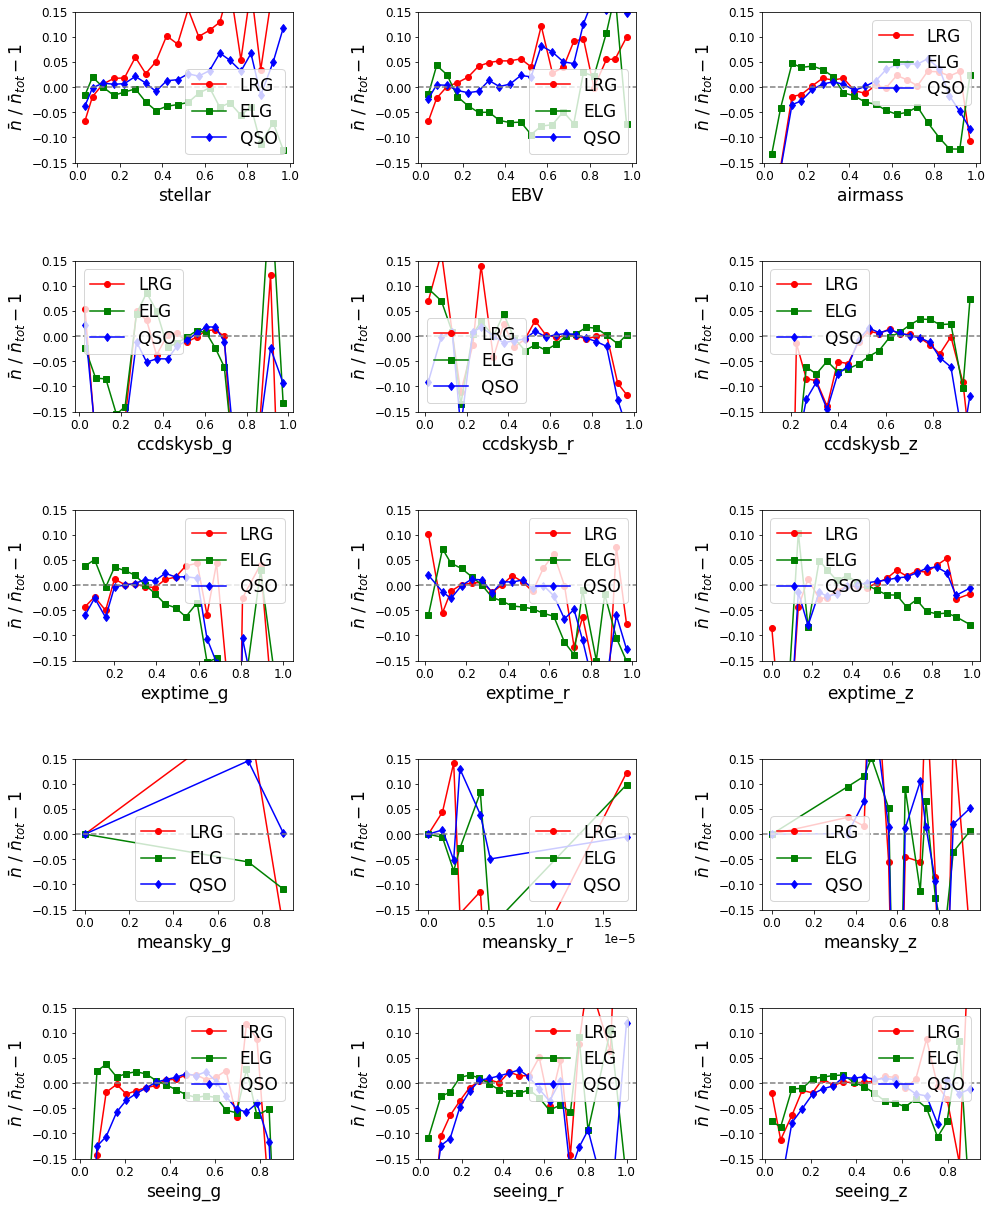

In [136]:

df_test_south['lrg_density'] = (df_test_south['lrg']/df_test_south.lrg.mean()) - 1
df_test_south['elg_density'] = (df_test_south['elg']/df_test_south.elg.mean()) - 1
df_test_south['qso_density'] = (df_test_south['qso']/df_test_south.qso.mean()) - 1
df_test_south['lrg_lin_density'] = (df_test_south['lrg_lin']/df_test_south.lrg.mean()) - 1
df_test_south['elg_lin_density'] = (df_test_south['elg_lin']/df_test_south.elg.mean()) - 1
df_test_south['qso_lin_density'] = (df_test_south['qso_lin']/df_test_south.qso.mean()) - 1
area = "south"
print(len(col))
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,18))
#plt.title("Raw Test Set Systematics Dependency - North")
#fig = plt.figure()
i = 0
for ax in ax.flatten():
    x_label = col[i]
    df_test_south['bin'] = pd.cut(df_test_south[x_label], bins=20, labels=False, duplicates='drop', include_lowest=True)
    #df_test_south['bin'] = pd.qcut(df_test_south[x_label], q=15, labels=False, duplicates='drop')
    """print(x_label)
    print(df_test_south['bin'].value_counts())
    i += 1
    continue"""
    grouped = df_test_south.groupby('bin')
    x = grouped[x_label].mean()
    lrg = grouped['lrg_density'].mean()
    elg = grouped['elg_density'].mean()
    qso = grouped['qso_density'].mean()

    plt.axes(ax)
    plt.plot(x,lrg, c='red', marker='o', label="LRG")
    plt.plot(x, elg, c='green', marker='s', label="ELG")
    plt.plot(x, qso, c='blue', marker='d', label="QSO")
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.ylim([-0.15, 0.15])
    plt.xlabel(x_label)
    plt.ylabel(r'$\bar n \  / \  \bar n_{tot} - 1 $')
    plt.legend()

    i += 1

#plt.suptitle("Impact of Imaging Systematics on Galaxy Density - North")
fig.tight_layout(pad=3.0)
#plt.savefig(f"report_fig/{area}_sys_test.eps", bbox_inches='tight', format='eps', dpi=1200)
plt.show()


## Getting Correlation COEFS


In [244]:
# Importing Datasets

df_test_north = pd.read_csv('results/north.csv')
df_test_south = pd.read_csv('results/south.csv')
df_test_des = pd.read_csv('results/des.csv')


In [245]:
df_test_north.columns

Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_deep', 'elg_deep', 'qso_deep', 'lrg_nn', 'elg_nn', 'qso_nn'],
      dtype='object')

# NORTH

### obtaining visual metrics for evaluation of cleansing

In [246]:
area = 'north'
#df_test_north = df_test_des

df_test_north['lrg_density'] = (df_test_north['lrg']/df_test_north.lrg.mean()) - 1
df_test_north['elg_density'] = (df_test_north['elg']/df_test_north.elg.mean()) - 1
df_test_north['qso_density'] = (df_test_north['qso']/df_test_north.qso.mean()) - 1
df_test_north['lrg_lin_density'] = (df_test_north['lrg_lin']/df_test_north.lrg_lin.mean()) - 1
df_test_north['elg_lin_density'] = (df_test_north['elg_lin']/df_test_north.elg_lin.mean()) - 1
df_test_north['qso_lin_density'] = (df_test_north['qso_lin']/df_test_north.qso_lin.mean()) - 1
df_test_north['lrg_nn_density'] = (df_test_north['lrg_nn']/df_test_north.lrg_nn.mean()) - 1
df_test_north['elg_nn_density'] = (df_test_north['elg_nn']/df_test_north.elg_nn.mean()) - 1
df_test_north['qso_nn_density'] = (df_test_north['qso_nn']/df_test_north.qso_nn.mean()) - 1
df_test_north['lrg_deep_density'] = (df_test_north['lrg_deep']/df_test_north.lrg_deep.mean()) - 1
df_test_north['elg_deep_density'] = (df_test_north['elg_deep']/df_test_north.elg_deep.mean()) - 1
df_test_north['qso_deep_density'] = (df_test_north['qso_deep']/df_test_north.qso_deep.mean()) - 1


#

df_test_north.columns

Index(['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV',
       'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g',
       'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z',
       'seeing_g', 'seeing_r', 'seeing_z', 'lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_deep', 'elg_deep', 'qso_deep', 'lrg_nn', 'elg_nn', 'qso_nn',
       'lrg_density', 'elg_density', 'qso_density', 'lrg_lin_density',
       'elg_lin_density', 'qso_lin_density', 'lrg_nn_density',
       'elg_nn_density', 'qso_nn_density', 'lrg_deep_density',
       'elg_deep_density', 'qso_deep_density'],
      dtype='object')

In [247]:
y_lrg = df_test_north['lrg'] - df_test_north['lrg_deep']#.to_numpy(copy=True)
y_elg = df_test_north['elg'] - df_test_north['elg_deep']#.to_numpy(copy=True)
y_qso = df_test_north['qso'] - df_test_north['qso_deep']#.to_numpy(copy=True)

print(y_lrg.mean())
print(y_elg.mean())

==============================================LRG==================================
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              2.139
Date:                Tue, 31 Aug 2021   Prob (F-statistic):                     0.00631
Time:                        18:22:01   Log-Likelihood:                         -75885.
No. Observations:               19505   AIC:                                  1.518e+05
Df Residuals:                   19490   BIC:                                  1.519e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err    

In [ ]:

X = df_test_north.drop(columns=['pixel_id',
                                'exposures', 'lrg', 'elg', 'qso',
                                'lrg_lin', 'elg_lin', 'qso_lin',
       'lrg_deep', 'elg_deep', 'qso_deep', 'lrg_nn', 'elg_nn', 'qso_nn',
       'lrg_density', 'elg_density', 'qso_density', 'lrg_lin_density',
       'elg_lin_density', 'qso_lin_density', 'lrg_nn_density',
       'elg_nn_density', 'qso_nn_density', 'lrg_deep_density',
       'elg_deep_density', 'qso_deep_density'])#.to_numpy(copy=True)

ols_lrg_geometric = sm.OLS(y_lrg,X).fit()
print("==============================================LRG==================================")
print(ols_lrg_geometric.summary())
print()
ols_elg_geometric = sm.OLS(y_elg,X).fit()
print("==============================================ELG==================================")
print(ols_elg_geometric.summary())
print()
ols_qso_geometric = sm.OLS(y_qso,X).fit()
print("==============================================QSO==================================")
print(ols_qso_geometric.summary())




NORTH - LINEAR

LRG: Stellar - Highly Significant
ELG: meansky_r
QSO: EBV, exptime_g, ccdskysb_z, meansky_g, seeing_g


North - NN:
LRG: Stellar
ELG: Stellar, EBV, Airmass, SB_Z, Exp_Z, seeing_G
QSO: Stellar, EBV, ALL SB, Mean sky g r




In [ ]:

df_test_des['lrg_density'] = (df_test_des['lrg']/df_test_des.lrg.mean()) - 1
df_test_des['elg_density'] = (df_test_des['elg']/df_test_des.elg.mean()) - 1
df_test_des['qso_density'] = (df_test_des['qso']/df_test_des.qso.mean()) - 1
df_test_des['lrg_lin_density'] = (df_test_des['lrg_lin']/df_test_des.lrg.mean()) - 1
df_test_des['elg_lin_density'] = (df_test_des['elg_lin']/df_test_des.elg.mean()) - 1
df_test_des['qso_lin_density'] = (df_test_des['qso_lin']/df_test_des.qso.mean()) - 1
area = "des"
print(len(col))
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,18))
#plt.title("Raw Test Set Systematics Dependency - North")
#fig = plt.figure()
i = 0
for ax in ax.flatten():
    x_label = col[i]
    df_test_des['bin'] = pd.cut(df_test_des[x_label], bins=20, labels=False, duplicates='drop', include_lowest=True)
    #df_test_south['bin'] = pd.qcut(df_test_south[x_label], q=15, labels=False, duplicates='drop')
    print(x_label)
    print(df_test_des['bin'].value_counts())
    i += 1
    continue
    grouped = df_test_des.groupby('bin').value
    x = grouped[x_label].mean()
    lrg = grouped['lrg_density'].mean()
    elg = grouped['elg_density'].mean()
    qso = grouped['qso_density'].mean()

    plt.axes(ax)
    plt.plot(x,lrg, c='red', marker='o', label="LRG")
    plt.plot(x, elg, c='green', marker='s', label="ELG")
    plt.plot(x, qso, c='blue', marker='d', label="QSO")
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.ylim([-0.2, 0.2])
    plt.xlabel(x_label)
    plt.ylabel(r'$\bar n \  / \  \bar n_{tot} - 1 $')
    plt.legend()

    i += 1

#plt.suptitle("Impact of Imaging Systematics on Galaxy Density - North")
fig.tight_layout(pad=3.0)
#plt.savefig(f"report_fig/{area}_sys_test.eps", bbox_inches='tight', format='eps', dpi=1200)
plt.show()

In [ ]:
df_test_north.columns

In [ ]:
y_lrg = df_test_north['lrg']#.to_numpy(copy=True)
y_elg = df_test_north['elg']#.to_numpy(copy=True)
y_qso = df_test_north['qso']#.to_numpy(copy=True)

X = df_test_north.drop(columns=['pixel_id',
                                'exposures',
                                'lrg','elg','qso',
                                'lrg_density','elg_density','qso_density',
                                'lrg_lin','elg_lin','qso_lin',
                                'lrg_lin_density','elg_lin_density','qso_lin_density',
                                'bin'])#.to_numpy(copy=True)

ols_lrg_geometric = sm.OLS(y_lrg,X).fit()
print(ols_lrg_geometric.summary())
print()
ols_elg_geometric = sm.OLS(y_elg,X).fit()
print(ols_elg_geometric.summary())
print()
ols_qso_geometric = sm.OLS(y_qso,X).fit()
print(ols_qso_geometric.summary())



In [ ]:
print(len(col))
nrows = 5
ncols = 3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    x_label = col[i]
    df_test_north['bin'] = pd.cut(df_test_north[x_label], bins=20, labels=False, duplicates='drop', include_lowest=True)
    grouped = df_test_north.groupby('bin')
    x = grouped[x_label].mean()
    lrg = grouped['lrg_lin_density'].mean()
    elg = grouped['elg_lin_density'].mean()
    qso = grouped['qso_lin_density'].mean()
    plt.axes(ax)
    plt.plot(x,lrg, c='red', marker='o', label="LRG")
    plt.plot(x, elg, c='green', marker='s', label="ELG")
    plt.plot(x, qso, c='blue', marker='d', label="QSO")
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.ylim([-0.5, 0.5])
    plt.xlabel(x_label)
    plt.ylabel("Galaxy Density North Clean")
    plt.legend()
    i += 1


fig.tight_layout(pad=3.0)
plt.show()

In [ ]:

y_lrg = df_test_north['lrg'] - df_test_north['lrg_lin']#.to_numpy(copy=True)
y_elg = df_test_north['elg'] - df_test_north['elg_lin']#.to_numpy(copy=True)
y_qso = df_test_north['qso'] - df_test_north['qso_lin']#.to_numpy(copy=True)

X = df_test_north.drop(columns=['pixel_id',
                                'exposures',
                                'lrg','elg','qso',
                                'lrg_density','elg_density','qso_density',
                                'lrg_lin','elg_lin','qso_lin',
                                'lrg_lin_density','elg_lin_density','qso_lin_density',
                                'bin'])#.to_numpy(copy=True)

ols_lrg_geometric = sm.OLS(y_lrg,X).fit()
print("==============================================LRG==================================")
print(ols_lrg_geometric.summary())
print()
ols_elg_geometric = sm.OLS(y_elg,X).fit()
print("==============================================ELG==================================")
print(ols_elg_geometric.summary())
print()
ols_qso_geometric = sm.OLS(y_qso,X).fit()
print("==============================================QSO==================================")
print(ols_qso_geometric.summary())



In [ ]:
df_test_north.describe()


In [ ]:

plt.plot(x,lrg, c='red', marker='o', label="LRG")
plt.plot(x,elg, c='green', marker='s', label="ELG")
plt.plot(x,qso, c='blue', marker='d', label="QSO")
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylim([-0.4,0.4])
plt.xlabel(x_label)
plt.ylabel("Galaxy Density North")
plt.legend()
plt.show()


In [ ]:
lrg = grouped['lrg_lin_density'].mean()
elg = grouped['elg_lin_density'].mean()
qso = grouped['qso_lin_density'].mean()

In [ ]:

plt.plot(x,lrg, c='red', marker='o', label="LRG")
plt.plot(x,elg, c='green', marker='s', label="ELG")
plt.plot(x,qso, c='blue', marker='d', label="QSO")
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylim([-0.4,0.4])
plt.xlabel(x_label)
plt.ylabel("Galaxy Density North")
plt.legend()
plt.show()


